In [ ]:
pip install pandas

In [ ]:
pip install matplotlib seaborn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv('/home/sifat/Downloads/full_grouped.csv')

In [8]:
df.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])


Global data


In [18]:
worldwide_data= df.groupby('Date').sum().reset_index()
latest_global_data= worldwide_data.iloc[-1]

print("Latest Global Summary: ")
print(latest_global_data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']])

Latest Global Summary: 
Confirmed    16480485
Deaths         654036
Recovered     9468087
Active        6358362
New cases      228693
Name: 187, dtype: object


In [16]:
df_global = df.groupby('Date').sum().reset_index()


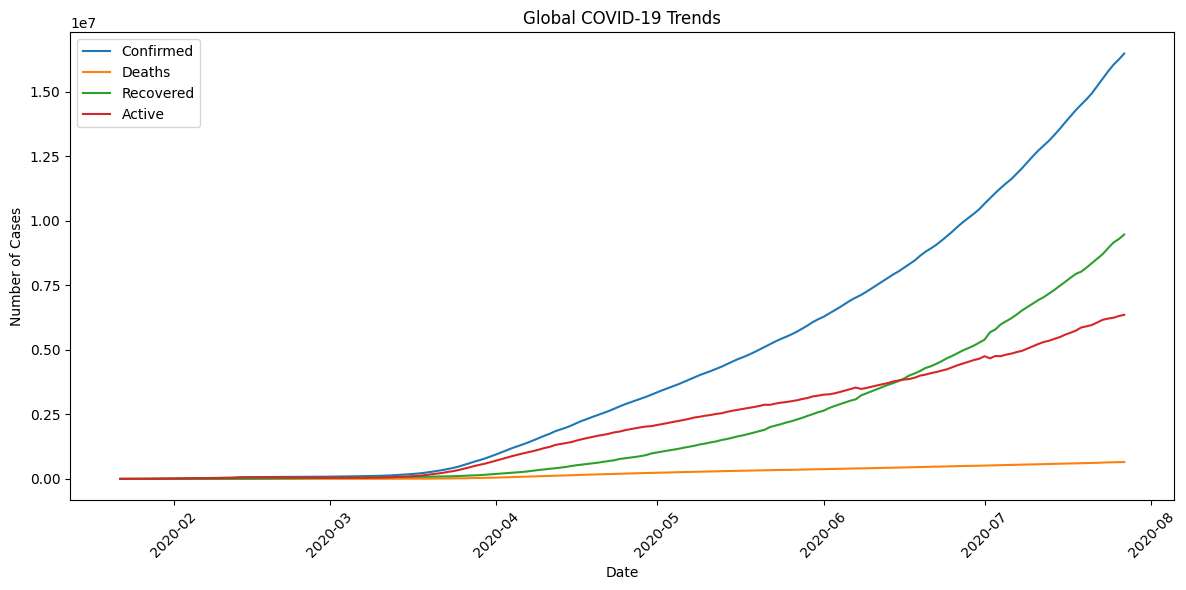

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df_global['Date'], df_global['Confirmed'], label='Confirmed')
plt.plot(df_global['Date'], df_global['Deaths'], label='Deaths')
plt.plot(df_global['Date'], df_global['Recovered'], label='Recovered')
plt.plot(df_global['Date'], df_global['Active'], label='Active')
plt.title('Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Country wise data


In [20]:
worldwide_data= df.groupby('Date').sum().reset_index()
latest_global_data= worldwide_data.iloc[-1]

Top 10 countries by confirmed case


In [23]:
latest_data = df.groupby('Country/Region').last().reset_index()

top_countries = latest_data.sort_values('Confirmed', ascending=False).head(10)


In [27]:
print("Top 10 Countries by Confirmed Cases:")
print(top_countries[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']])


Top 10 Countries by Confirmed Cases:
     Country/Region  Confirmed  Deaths  Recovered   Active  New cases
173              US    4290259  148011    1325804  2816444      56336
23           Brazil    2442375   87618    1846641   508116      23284
79            India    1480073   33408     951166   495499      44457
138          Russia     816680   13334     602249   201097       5607
154    South Africa     452529    7067     274925   170537       7096
111          Mexico     395489   44022     303810    47657       4973
132            Peru     389717   18418     272547    98752      13756
35            Chile     347923    9187     319954    18782       2133
177  United Kingdom     301708   45844       1437   254427        688
81             Iran     293606   15912     255144    22550       2434


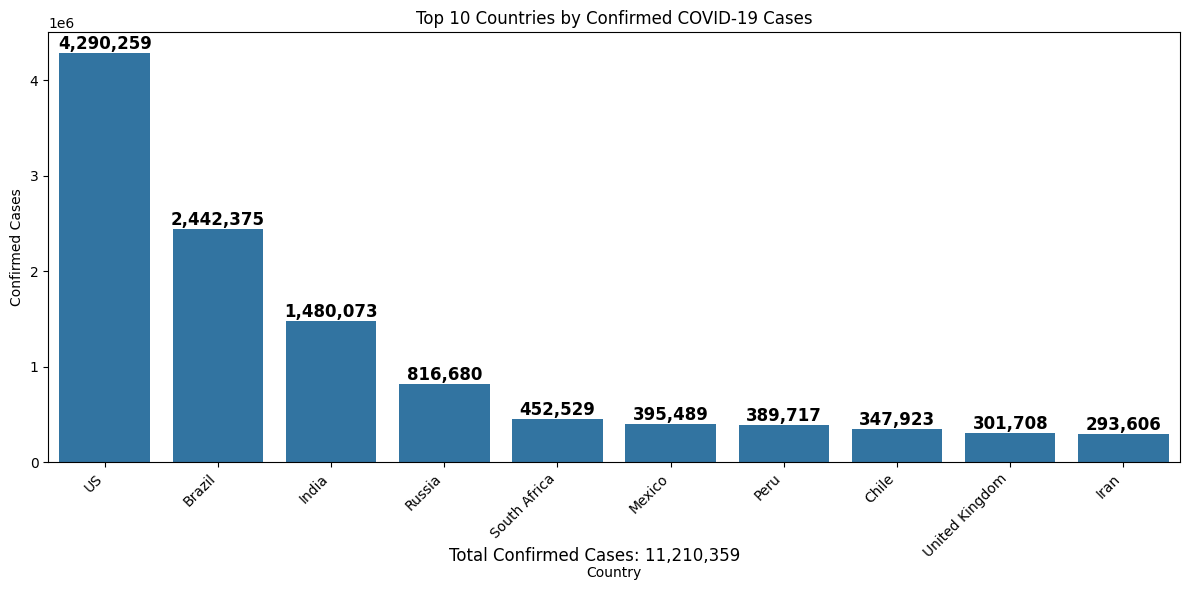

In [25]:
plt.figure(figsize=(12, 6))

total_confirmed = top_countries['Confirmed'].sum()

sns.barplot(x='Country/Region', y='Confirmed', data=top_countries)
for bar, label in zip(plt.gca().patches, top_countries['Confirmed']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{label:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.figtext(0.5, 0.05, f'Total Confirmed Cases: {total_confirmed:,.0f}', ha='center', va='bottom', fontsize=12) 

plt.show()

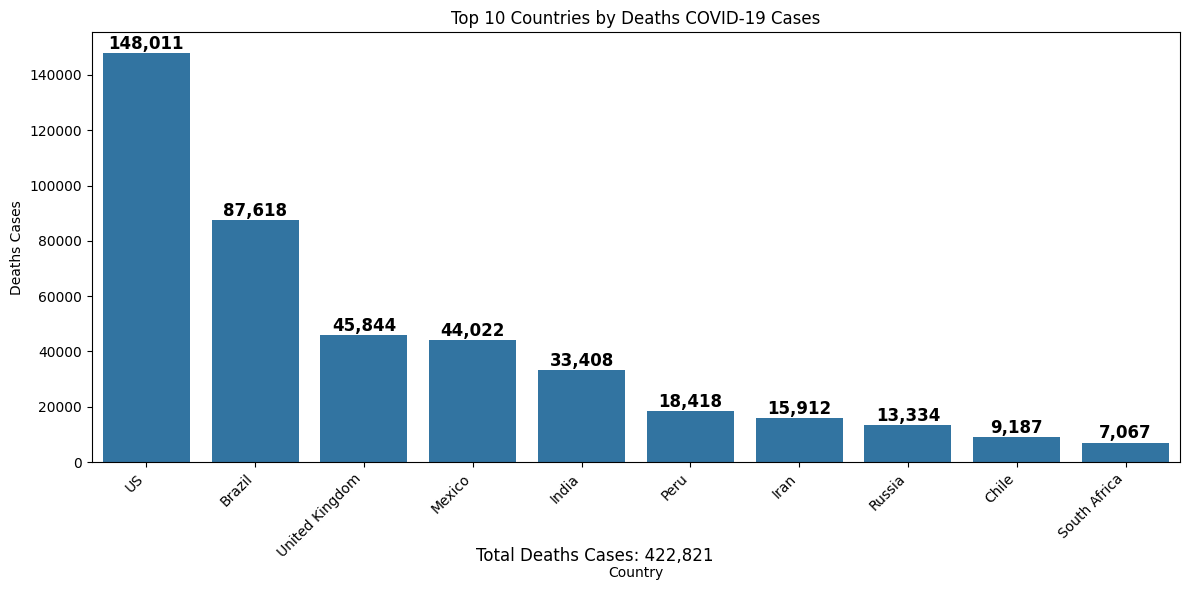

In [30]:
plt.figure(figsize=(12, 6))
top_countries_sorted = top_countries.sort_values(by='Deaths', ascending=False).head(10)

total_deaths = top_countries_sorted['Deaths'].sum()
sns.barplot(x='Country/Region', y='Deaths', data=top_countries_sorted)
for bar, label in zip(plt.gca().patches, top_countries_sorted['Deaths']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{label:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top 10 Countries by Deaths COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Deaths Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.figtext(0.5, 0.05, f'Total Deaths Cases: {total_deaths:,.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

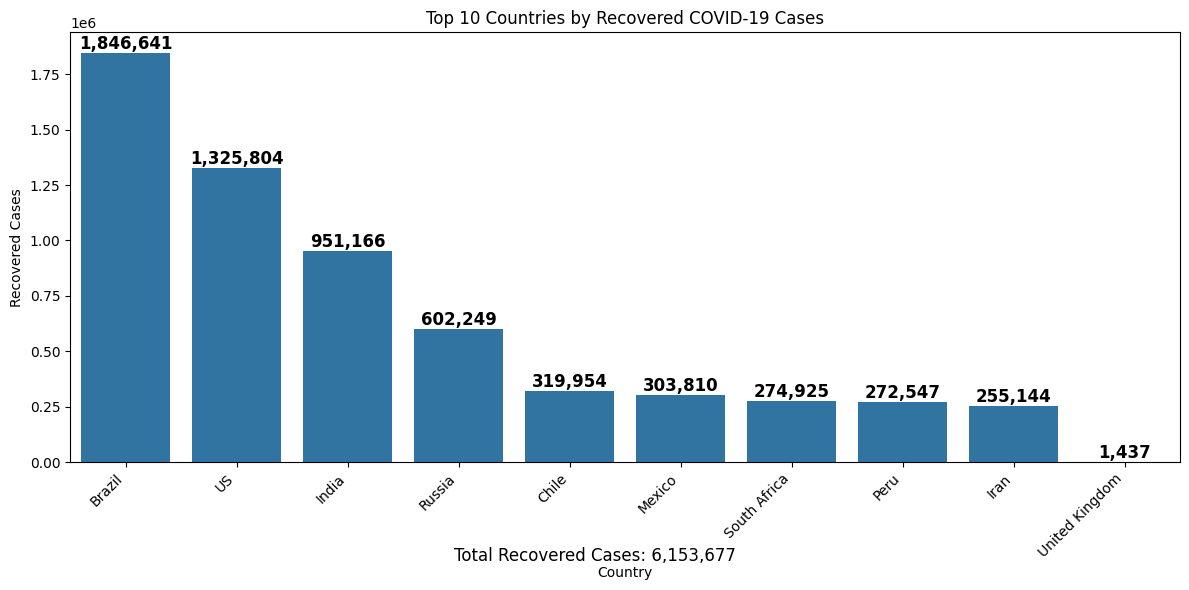

In [31]:
plt.figure(figsize=(12, 6))
top_countries_sorted = top_countries.sort_values(by='Recovered', ascending=False).head(10)

total_deaths = top_countries_sorted['Recovered'].sum()
sns.barplot(x='Country/Region', y='Recovered', data=top_countries_sorted)
for bar, label in zip(plt.gca().patches, top_countries_sorted['Recovered']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{label:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top 10 Countries by Recovered COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.figtext(0.5, 0.05, f'Total Recovered Cases: {total_deaths:,.0f}', ha='center', va='bottom', fontsize=12)

plt.show()

Analysis of specific countries-['Bangladesh', 'India', 'Nepal', 'China', 'Pakistan'] 

In [32]:
countries=['Bangladesh', 'India', 'Nepal', 'China', 'Pakistan']
filtered_df = df[df['Country/Region'].isin(countries)]


In [34]:
latest_data = filtered_df.groupby('Country/Region').last().reset_index()
print(latest_data[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']])

  Country/Region  Confirmed  Deaths  Recovered  Active
0     Bangladesh     226225    2965     125683   97577
1          China      86783    4656      78869    3258
2          India    1480073   33408     951166  495499
3          Nepal      18752      48      13754    4950
4       Pakistan     274289    5842     241026   27421


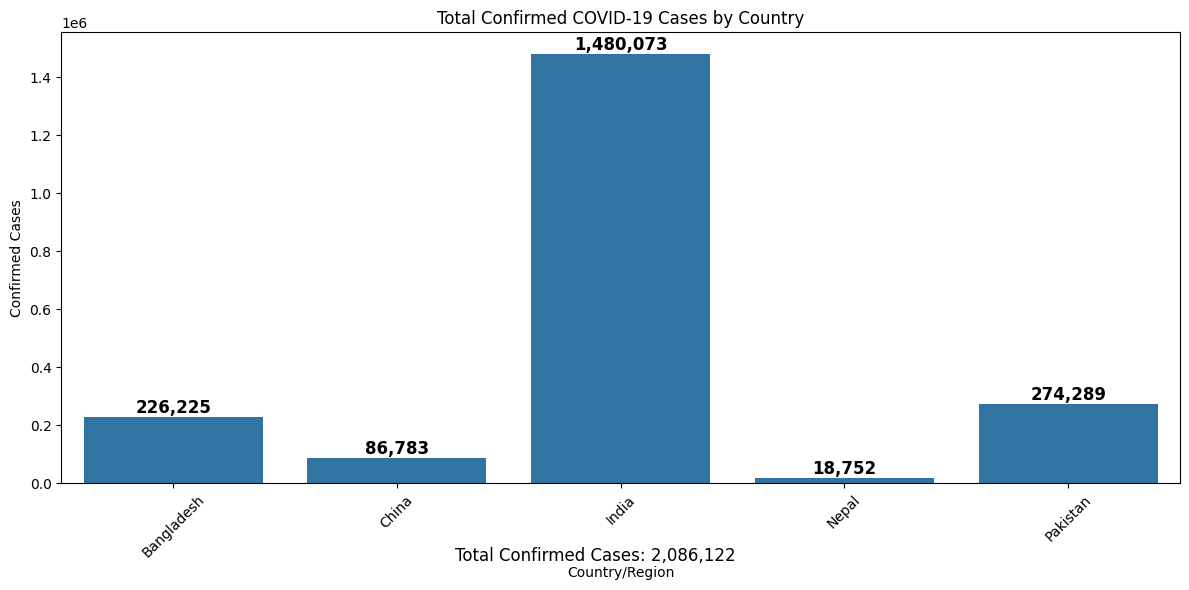

In [36]:
total_confirmed1 = latest_data['Confirmed'].sum()

plt.figure(figsize=(12, 6))

sns.barplot(x='Country/Region', y='Confirmed', data=latest_data)
for bar, label in zip(plt.gca().patches, latest_data['Confirmed']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{label:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title('Total Confirmed COVID-19 Cases by Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.figtext(0.5, 0.05, f'Total Confirmed Cases: {total_confirmed1:,.0f}', ha='center', va='bottom', fontsize=12)

plt.show()


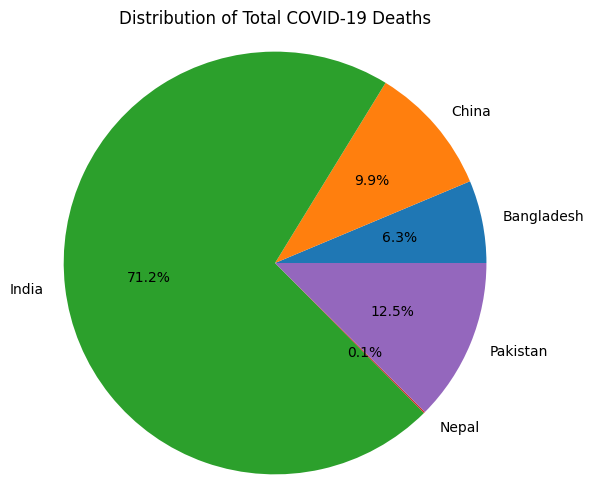

In [38]:
plt.figure(figsize=(6, 6))
plt.pie(latest_data['Deaths'], labels=latest_data['Country/Region'], autopct='%1.1f%%')
plt.title('Distribution of Total COVID-19 Deaths')
plt.axis('equal')
plt.show()


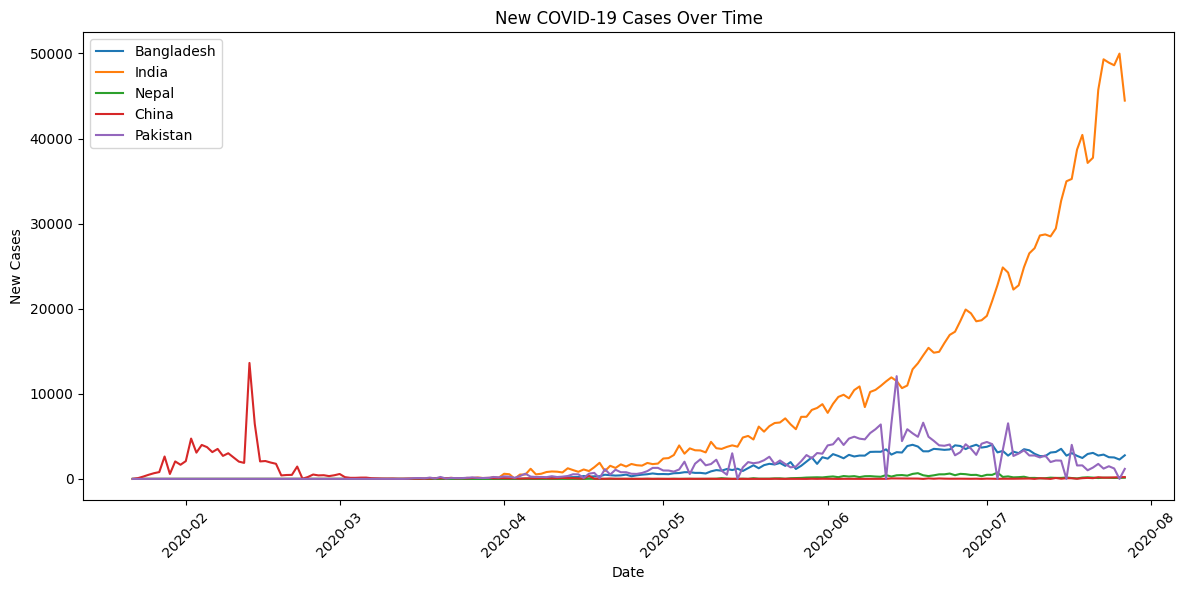

In [39]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_df[filtered_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['New cases'], label=country)
plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()